In [1]:
!pip install librosa

   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/260.1 kB 640.0 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/260.1 kB 388.9 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/260.1 kB 521.8 kB/s eta 0:00:01
   ----------------- -------------------- 122.9/260.1 kB 599.1 kB/s eta 0:00:01
   ---------------------- --------------- 153.6/260.1 kB 654.6 kB/s eta 0:00:01
   ---------------------------------- --- 235.5/260.1 kB 846.9 kB/s eta 0:00:01
   -------------------------------------- 260.1/260.1 kB 798.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/75.1 kB ? eta -:--:--
   -------------------------------- ------- 61.4/75.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 75.1/75.1 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.6 MB 5.3 MB/s eta 0:00:0

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
!cd C:/Users/darsh

Code To Conver the Audio Into Waveform

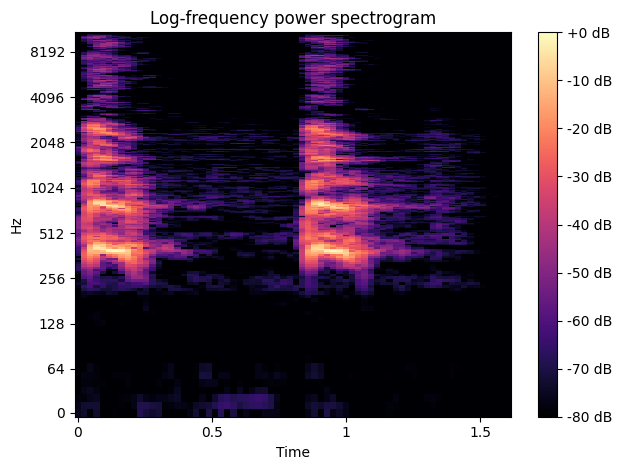

<Figure size 640x480 with 0 Axes>

In [11]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio, sr = librosa.load('C:/Users/darsh/Deep_Learning/mixkit-dog-barking-twice-1.wav')

# Compute the Fourier transform
D = np.abs(librosa.stft(audio))

# Plot the spectrogram
img = librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Log-frequency power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# Save the spectrogram as an image
plt.savefig('dog_bark.jpg', dpi=300, bbox_inches='tight')

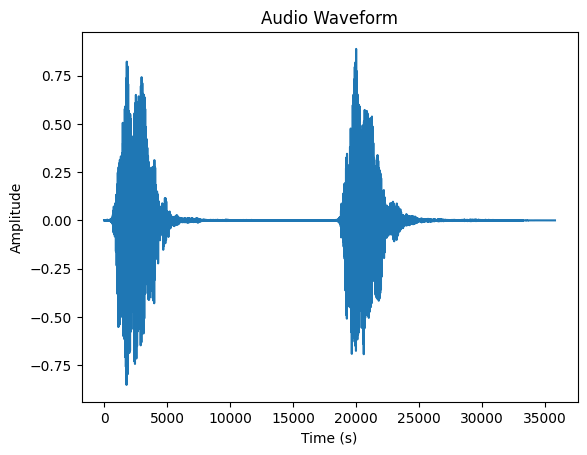

<Figure size 640x480 with 0 Axes>

In [12]:
plt.plot(audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

plt.savefig('dog_bark1.jpg', dpi=300, bbox_inches='tight')

In [21]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt

def read_wav_file(file_path):
    """Read a .wav file and return the signal data and sample rate."""
    with wave.open(file_path, 'r') as wav_file:
        sample_rate = wav_file.getframerate()
        n_frames = wav_file.getnframes()
        signal = wav_file.readframes(n_frames)
        signal = np.frombuffer(signal, dtype=np.int16)
    return signal, sample_rate

def plot_waveform(signal, sample_rate, output_path):
    """Plot and save the waveform of a signal."""
    time = np.linspace(0, len(signal) / sample_rate, num=len(signal))
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal)
    plt.savefig(output_path)
    plt.close()

def process_dataset(input_dir, output_dir):
    """Process all .wav files in the input directory and save their waveforms."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for file_name in os.listdir(input_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(input_dir, file_name)
            signal, sample_rate = read_wav_file(file_path)
            output_path = os.path.join(output_dir, f'{os.path.splitext(file_name)[0]}.png')
            plot_waveform(signal, sample_rate, output_path)
            print(f'Saved waveform for {file_name} to {output_path}')

# Define your dataset directory and output directory
input_directory = 'C:/Users/darsh/Deep_Learning/Wave Classifiaction/wav_data'
output_directory = 'C:/Users/darsh/Deep_Learning/Wave Classifiaction/Wave_Images'

# Process the dataset
process_dataset(input_directory, output_directory)

Saved waveform for mixkit-dog-barking-twice-1.wav to C:/Users/darsh/Deep_Learning/Wave Classifiaction/Wave_Images\mixkit-dog-barking-twice-1.png


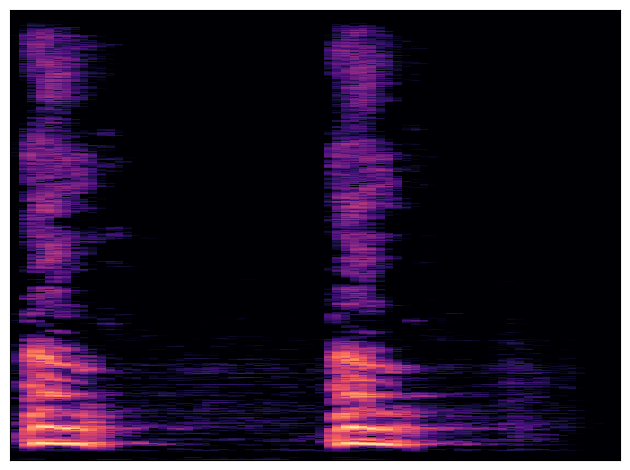

<Figure size 640x480 with 0 Axes>

In [65]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_path = 'C:/Users/darsh/Deep_Learning/Wave Classifiaction/wav_data/mixkit-dog-barking-twice-1.wav'
audio, sr = librosa.load(audio_path)

# Compute the Fourier transform
D = np.abs(librosa.stft(audio))

# Plot the spectrogram
img = librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max))
# plt.title('Log-frequency power spectrogram')
# plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# Save the spectrogram as an image
output_image_path = 'dog_bark1.jpg'
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [66]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define paths
audio_dataset_path = 'C:/Users/darsh/Deep_Learning/Wave Classifiaction/wav_data'
image_dataset_path = 'C:/Users/darsh/Deep_Learning/Wave Classifiaction/Wave_Images'

# Function to convert audio to mel spectrogram and save as image
def audio_to_mel_spectrogram(audio_path, save_path):
    y, sr = librosa.load(audio_path, sr=None)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

# Create images for all audio files in the dataset
for root, _, files in os.walk(audio_dataset_path):
    for file in files:
        if file.endswith('.wav'):
            audio_path = os.path.join(root, file)
            save_path = os.path.join(image_dataset_path, file.replace('.wav', '.png'))
            audio_to_mel_spectrogram(audio_path, save_path)


In [ ]:
import os
import pandas as pd
import numpy as np
import librosa

# Path to the UrbanSound8K dataset
dataset_path = 'path_to_UrbanSound8K'
metadata_path = os.path.join(dataset_path, 'metadata/UrbanSound8K.csv')

# Load metadata
metadata = pd.read_csv(metadata_path)

# Function to load audio file and convert to waveform
def load_audio_file(file_path):
    waveform, sample_rate = librosa.load(file_path, sr=None)
    return waveform, sample_rate

# Directory to save waveforms
waveform_dir = 'path_to_save_waveforms'
os.makedirs(waveform_dir, exist_ok=True)

# Process each audio file in the dataset
waveform_data = []

for index, row in metadata.iterrows():
    fold = row['fold']
    file_name = row['slice_file_name']
    file_path = os.path.join(dataset_path, f'fold{fold}', file_name)
    
    # Load audio file and convert to waveform
    waveform, sample_rate = load_audio_file(file_path)
    
    # Save waveform and metadata
    waveform_info = {
        'file_name': file_name,
        'waveform': waveform,
        'sample_rate': sample_rate,
        'class': row['class']
    }
    waveform_data.append(waveform_info)
    
    # Optional: Save waveform to a file for later use
    np.save(os.path.join(waveform_dir, file_name.replace('.wav', '.npy')), waveform)

# Convert the waveform data list to a DataFrame for easier manipulation
waveform_df = pd.DataFrame(waveform_data)

# Save the waveform DataFrame to a CSV file
waveform_df.to_csv(os.path.join(waveform_dir, 'waveform_data.csv'), index=False)

print("Waveform dataset creation completed.")
